In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from Utilities import *

In [48]:
data = pd.read_csv('E:\Hamoye_Data_Science_Internship\Datasets\Electrical_Grid_Stability_Dataset\Data_for_UCI_named.csv')

In [49]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [50]:
data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [51]:
data1 = data.drop('stab', axis=1)

In [52]:
from sklearn.utils import shuffle
data1 = shuffle(data1)
data1

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
1883,4.082411,2.734285,5.361121,0.978544,3.210408,-1.056689,-1.441118,-0.712601,0.799795,0.205570,0.874539,0.322824,unstable
5797,3.569685,1.142863,1.638902,5.852881,3.653735,-1.481185,-1.649550,-0.523000,0.443099,0.900567,0.466806,0.544323,stable
685,6.123930,2.814170,7.496177,3.956885,3.374875,-1.175681,-1.535385,-0.663809,0.291558,0.506118,0.376059,0.586728,unstable
1794,0.658554,6.405490,1.777702,9.809554,3.907736,-1.375404,-1.246962,-1.285369,0.471324,0.202991,0.595310,0.580121,stable
4012,4.600767,8.719776,0.734549,3.679467,3.995575,-1.242315,-1.622263,-1.130997,0.486115,0.802382,0.605952,0.440778,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,8.960540,8.314690,1.585142,1.260668,4.085031,-1.402283,-1.380922,-1.301826,0.354263,0.858726,0.884968,0.237228,stable
7305,1.619402,5.798795,4.777934,7.421569,3.966839,-1.329968,-1.797310,-0.839561,0.759259,0.087301,0.722460,0.603556,unstable
5084,4.250442,5.819025,3.208636,8.355548,4.439128,-1.217148,-1.542370,-1.679610,0.990591,0.851701,0.854749,0.851780,unstable
4099,0.641620,9.147634,9.180077,5.980858,3.792128,-1.594943,-1.091799,-1.105387,0.571042,0.297388,0.933312,0.695463,unstable


In [53]:
en = LabelEncoder()
data1['stabf'] = en.fit_transform(data1['stabf'])

In [54]:
data1.value_counts()

tau1      tau2      tau3      tau4      p1        p2         p3         p4         g1        g2        g3        g4        stabf
0.500793  6.734360  5.284357  5.797771  3.387591  -0.752656  -0.972783  -1.662152  0.802707  0.204237  0.642260  0.513210  0        1
6.836982  9.666273  7.426696  4.970267  3.361971  -0.576022  -0.825520  -1.960429  0.160843  0.347951  0.591763  0.106057  1        1
6.830438  8.825121  2.375126  8.957928  4.350904  -1.479915  -1.001004  -1.869985  0.836488  0.055149  0.233569  0.865382  1        1
6.831522  9.605821  7.707207  6.426386  4.837150  -1.647183  -1.447027  -1.742941  0.511570  0.912095  0.748709  0.906299  1        1
6.832148  5.013236  5.279009  6.710398  3.063036  -1.254048  -0.749304  -1.059683  0.137511  0.791880  0.936726  0.081260  1        1
                                                                                                                                   ..
3.666680  3.768349  4.988268  7.830328  3.804089  -1.760354  -0.629

In [55]:
X = data1.drop('stabf', axis=1)
y = data1['stabf']

In [56]:
print("X-shape:", X.shape)
print("y-shape:", y.shape)

X-shape: (10000, 12)
y-shape: (10000,)


In [57]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
1883,4.082411,2.734285,5.361121,0.978544,3.210408,-1.056689,-1.441118,-0.712601,0.799795,0.205570,0.874539,0.322824
5797,3.569685,1.142863,1.638902,5.852881,3.653735,-1.481185,-1.649550,-0.523000,0.443099,0.900567,0.466806,0.544323
685,6.123930,2.814170,7.496177,3.956885,3.374875,-1.175681,-1.535385,-0.663809,0.291558,0.506118,0.376059,0.586728
1794,0.658554,6.405490,1.777702,9.809554,3.907736,-1.375404,-1.246962,-1.285369,0.471324,0.202991,0.595310,0.580121
4012,4.600767,8.719776,0.734549,3.679467,3.995575,-1.242315,-1.622263,-1.130997,0.486115,0.802382,0.605952,0.440778
...,...,...,...,...,...,...,...,...,...,...,...,...
5922,8.960540,8.314690,1.585142,1.260668,4.085031,-1.402283,-1.380922,-1.301826,0.354263,0.858726,0.884968,0.237228
7305,1.619402,5.798795,4.777934,7.421569,3.966839,-1.329968,-1.797310,-0.839561,0.759259,0.087301,0.722460,0.603556
5084,4.250442,5.819025,3.208636,8.355548,4.439128,-1.217148,-1.542370,-1.679610,0.990591,0.851701,0.854749,0.851780
4099,0.641620,9.147634,9.180077,5.980858,3.792128,-1.594943,-1.091799,-1.105387,0.571042,0.297388,0.933312,0.695463


In [58]:
X_norm = standard_scale(dataframe=X)
X_norm.shape

(10000, 12)

In [59]:
import pandas as pd
X_norm = pd.DataFrame(X_norm)
X_norm = shuffle(X_norm)
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11
7448,0.919198,-0.304361,-1.299006,0.520735,0.661453,-1.176929,-0.873870,0.901887,-0.590369,-0.447743,-0.660780,-0.003984
3461,-0.787630,-0.160658,0.854675,-1.385123,0.419472,-0.280278,0.549337,-0.997662,1.014048,-1.727774,1.236342,1.498530
3693,0.658332,1.474341,-0.754224,-1.216081,-1.131336,0.830706,1.161349,-0.026981,0.131754,-0.059226,0.578448,-0.324170
7842,-0.418873,-1.356350,-1.261361,1.617946,2.004250,-1.103445,-1.343594,-1.034243,0.489096,0.848547,1.153906,0.015944
5109,-0.382641,-0.640331,-1.134658,-0.587811,0.925747,-0.841207,0.914119,-1.680888,-1.634668,-0.955977,1.123322,0.172077
...,...,...,...,...,...,...,...,...,...,...,...,...
7447,1.394624,0.714675,-0.189909,1.027889,-0.535997,0.898596,0.806176,-0.773771,-0.248661,0.271683,-0.643554,1.280511
1026,-0.237946,-1.120760,0.354691,0.212494,1.109593,-1.372135,1.071894,-1.627068,-1.161694,1.611472,0.633610,-1.018400
1982,-1.149112,1.618555,1.469492,1.684386,-2.259321,0.714699,1.568722,1.640906,1.094258,0.314254,-1.686171,-0.382350
6961,-1.566178,1.674125,-1.731449,0.967592,1.859155,-1.211405,-1.647649,-0.370206,1.104850,0.604922,1.550203,0.727386


In [60]:
y = pd.DataFrame(y.astype('float64'))
y

,stabf
1883,1.0
5797,0.0
685,1.0
1794,0.0
4012,0.0
...,...
5922,0.0
7305,1.0
5084,1.0
4099,1.0


In [61]:
y.value_counts()

stabf
1.0      6380
0.0      3620
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 12)
y_train shape: (8000, 1)
X_test shape: (2000, 12)
y_test shape: (2000, 1)


In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier

Random Forest Classifier

In [64]:
rand_forest_classifier_unsmoted = RandomForestClassifier(n_estimators=1000)
rand_forest_classifier_unsmoted.fit(X_train, y_train)

C:\Users\mvsg2\AppData\Local\Temp\ipykernel_13128\169141684.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_forest_classifier_unsmoted.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [65]:
preds_rand_forest_unsmoted = rand_forest_classifier_unsmoted.predict(X_test)

In [66]:
print_accuracy(y_pred=preds_rand_forest_unsmoted, y_test=np.array(y_test))

Accuracy: 64.0%


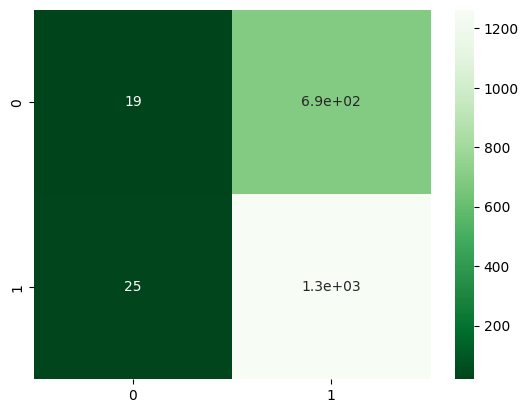

In [67]:
sns.heatmap(data=confusion_matrix(y_pred=preds_rand_forest_unsmoted, y_true=np.array(y_test)), cmap='Greens_r', annot=True)
plt.show()

In [68]:
print_cm(y_pred=preds_rand_forest_unsmoted, y_test=np.array(y_test))

The confusion matrix is:
 [[  19  693]
 [  25 1263]]



In [69]:
print_report(y_pred=preds_rand_forest_unsmoted, y_test=np.array(y_test))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.43      0.03      0.05       712
         1.0       0.65      0.98      0.78      1288

    accuracy                           0.64      2000
   macro avg       0.54      0.50      0.41      2000
weighted avg       0.57      0.64      0.52      2000


Extra Trees Classifier

In [70]:
extra_trees_classifier_unsmoted = ExtraTreesClassifier(n_estimators=1000, bootstrap=True, n_jobs=5, random_state=1, warm_start=True)
extra_trees_classifier_unsmoted.fit(X_train, y_train)

C:\Users\mvsg2\AppData\Local\Temp\ipykernel_13128\1461824789.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier_unsmoted.fit(X_train, y_train)


ExtraTreesClassifier(bootstrap=True, n_estimators=1000, n_jobs=5,
                     random_state=1, warm_start=True)

In [71]:
preds_extra_trees_unsmoted = extra_trees_classifier_unsmoted.predict(X_test)

In [72]:
print_accuracy(y_pred=preds_extra_trees_unsmoted, y_test=np.array(y_test))

Accuracy: 64.0%


In [73]:
print_cm(y_pred=preds_extra_trees_unsmoted, y_test=np.array(y_test))

The confusion matrix is:
 [[   1  711]
 [   5 1283]]



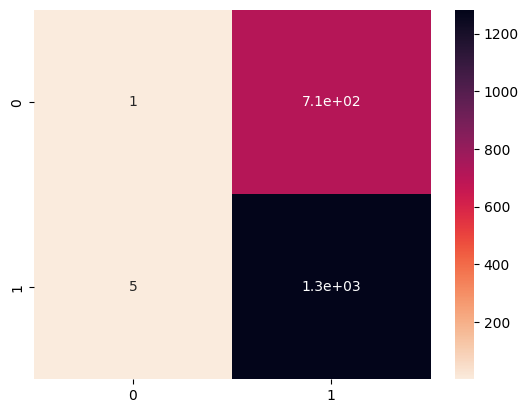

In [74]:
sns.heatmap(data=confusion_matrix(y_true=np.array(y_test), y_pred=preds_extra_trees_unsmoted), cmap='rocket_r', annot=True); plt.show()

In [75]:
print_report(y_pred=preds_extra_trees_unsmoted, y_test=np.array(y_test))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.17      0.00      0.00       712
         1.0       0.64      1.00      0.78      1288

    accuracy                           0.64      2000
   macro avg       0.41      0.50      0.39      2000
weighted avg       0.47      0.64      0.50      2000


XGBoost Classifier

In [76]:
xgBoost_classifier_unsmoted = XGBClassifier()
xgBoost_classifier_unsmoted.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
preds_xgboost_unsmoted = xgBoost_classifier_unsmoted.predict(X_test)

In [78]:
print_accuracy(y_pred=preds_xgboost_unsmoted, y_test=np.array(y_test))

Accuracy: 59.0%


In [79]:
print_cm(y_pred=preds_xgboost_unsmoted, y_test=np.array(y_test))

The confusion matrix is:
 [[ 117  595]
 [ 233 1055]]



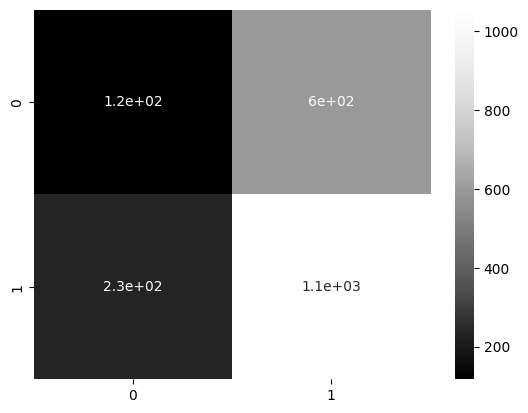

In [80]:
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=preds_xgboost_unsmoted), cmap='Greys_r', annot=True); plt.show()

In [81]:
print_report(y_pred=preds_xgboost_unsmoted, y_test=np.array(y_test))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.33      0.16      0.22       712
         1.0       0.64      0.82      0.72      1288

    accuracy                           0.59      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.53      0.59      0.54      2000


Light Gradient Boost Classifier

In [82]:
lgb_classifier_unsmoted = LGBMClassifier()
lgb_classifier_unsmoted.fit(X_train, y_train)

C:\Users\mvsg2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mvsg2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [83]:
preds_lgb_unsmoted = lgb_classifier_unsmoted.predict(X_test)

In [84]:
print_accuracy(y_pred=preds_lgb_unsmoted, y_test=np.array(y_test))

Accuracy: 62.0%


In [85]:
print_cm(y_pred=preds_lgb_unsmoted, y_test=np.array(y_test))

The confusion matrix is:
 [[  63  649]
 [ 111 1177]]



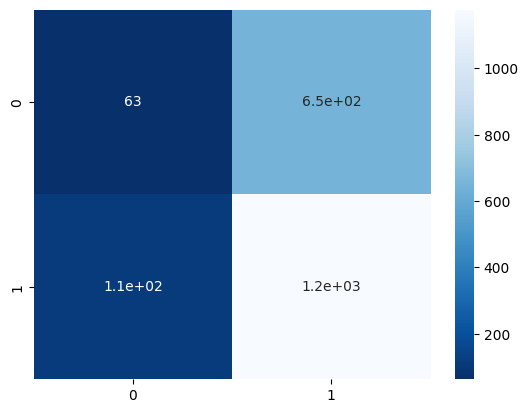

In [86]:
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=preds_lgb_unsmoted), cmap="Blues_r", annot=True); plt.show()

In [87]:
print_report(y_pred=preds_lgb_unsmoted, y_test=np.array(y_test))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.36      0.09      0.14       712
         1.0       0.64      0.91      0.76      1288

    accuracy                           0.62      2000
   macro avg       0.50      0.50      0.45      2000
weighted avg       0.54      0.62      0.54      2000


#### Smoting the dataset and training...

In [88]:
import imblearn
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state=1, n_jobs=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
X_test_bal, y_test_bal = smote.fit_resample(X_test, y_test)

In [90]:
X_train_bal.columns = X.columns
X_test_bal.columns = X.columns

In [91]:
X_train_bal

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.534519,0.731270,-1.409012,-0.649992,0.651345,1.029024,-1.700682,-0.459694,-1.463523,0.908224,-1.175088,0.765172
1,0.793901,-1.045300,1.557970,-0.591313,-0.136466,-0.546113,-0.702823,1.485970,-1.319020,-0.638243,0.923251,-1.433393
2,0.895352,0.663027,-0.943752,0.958411,1.133974,0.156865,-0.623953,-1.502568,-0.711361,1.643090,0.499867,-0.766881
3,0.554594,0.498149,-1.540539,-1.515526,-1.492328,1.473168,0.829418,0.289513,-0.627442,0.254898,-0.033186,-0.070744
4,1.655808,0.133572,-0.966203,-0.212267,-0.571028,0.434669,-0.067827,0.625005,0.151237,-1.155642,-1.047116,1.611302
...,...,...,...,...,...,...,...,...,...,...,...,...
10179,-0.882710,-0.412807,0.690122,-0.608147,0.956567,0.817366,-1.508223,-0.970652,-0.231089,-0.121298,-0.688009,1.427976
10180,0.633219,-1.489210,-1.347376,1.059374,1.200276,-0.419322,-1.373659,-0.291838,-1.549234,0.153616,0.519287,0.977738
10181,-0.895079,-0.853149,0.652088,-1.607060,0.502834,-0.132812,0.723369,-1.463954,-1.511668,0.452054,-0.790461,0.340381
10182,1.101672,-1.323010,-1.079295,0.583338,-0.246977,0.188537,-1.162286,1.402737,-1.286838,1.397487,-1.294239,0.527069


In [92]:
y_train_bal

,stabf
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
10179,0.0
10180,0.0
10181,0.0
10182,0.0


In [93]:
y_train_bal.value_counts()

stabf
0.0      5092
1.0      5092
dtype: int64

In [94]:
y_test_bal.value_counts()

stabf
0.0      1288
1.0      1288
dtype: int64

In [95]:
X_test_bal

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,1.492894,1.250531,0.847663,1.646845,0.315347,1.337302,-0.561435,-1.323608,0.850012,1.303292,-0.272730,-0.859406
1,-1.593697,-0.168076,0.723004,-0.940720,0.623343,-1.588188,1.642484,-1.137012,0.463183,-1.583219,1.310899,-0.284624
2,0.884666,-0.817623,-1.625452,1.454427,-0.241696,0.908770,-1.407106,0.918150,1.169337,1.026977,1.173376,-0.839492
3,-1.100374,0.845212,-0.826709,-0.868408,-0.591312,0.491697,-1.190573,1.725955,-0.229103,1.188243,0.102490,0.660462
4,-0.365416,-0.721335,-0.516329,1.094714,-0.848403,-1.248754,1.669805,1.052581,-0.924641,-0.693816,-0.613031,-1.604377
...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0.284641,-0.997163,0.535403,0.413722,2.418666,-1.099604,-1.621618,-1.479880,-0.739098,-0.675295,0.970484,-1.180836
2572,-0.995601,-0.579981,-0.094214,0.515860,-0.887148,1.052862,1.196688,-0.708619,-0.908178,-1.001946,-0.561537,1.114604
2573,1.535388,-1.516749,1.105724,-0.066534,-0.354513,0.060133,-0.685411,1.241049,-0.000857,-0.677988,1.335318,-1.080368
2574,0.608277,1.387631,-0.277771,-1.537013,0.328713,-1.103378,0.418767,0.113653,-1.671562,1.664976,0.036812,-0.651403


In [96]:
print("X_train_bal shape:", X_train_bal.shape)
print("y_train_bal shape:", y_train_bal.shape)
print("X_test_bal shape:", X_test_bal.shape)
print("y_test_bal shape:", y_test_bal.shape)

X_train_bal shape: (10184, 12)
y_train_bal shape: (10184, 1)
X_test_bal shape: (2576, 12)
y_test_bal shape: (2576, 1)


Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [98]:
random_forest_clf = RandomForestClassifier(n_estimators=1000)
random_forest_clf.fit(X_train_bal, y_train_bal)

C:\Users\mvsg2\AppData\Local\Temp\ipykernel_13128\3084227900.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_clf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(n_estimators=1000)

In [99]:
predictions_rand_forest = random_forest_clf.predict(X_test_bal)

In [100]:
predictions_rand_forest

array([0., 1., 1., ..., 1., 1., 0.])

In [101]:
y_test_bal.shape

(2576, 1)

In [102]:
print_accuracy(y_pred=predictions_rand_forest, y_test=np.array(y_test_bal))

Accuracy: 56.99999999999999%


In [103]:
print_cm(y_pred=predictions_rand_forest, y_test=np.array(y_test_bal))

The confusion matrix is:
 [[525 763]
 [357 931]]



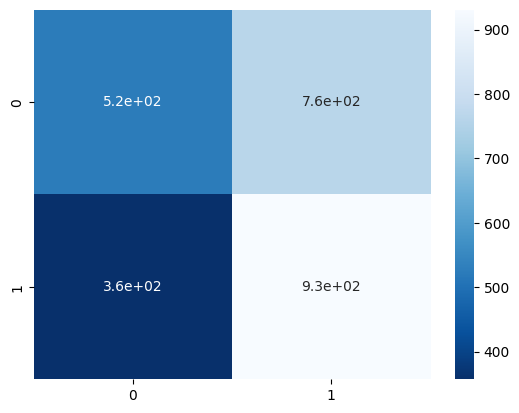

In [104]:
sns.heatmap(data=confusion_matrix(y_pred=predictions_rand_forest, y_true=np.array(y_test_bal)), annot=True, cmap='Blues_r')
plt.show()

In [105]:
print_report(y_pred=predictions_rand_forest, y_test=np.array(y_test_bal))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.60      0.41      0.48      1288
         1.0       0.55      0.72      0.62      1288

    accuracy                           0.57      2576
   macro avg       0.57      0.57      0.55      2576
weighted avg       0.57      0.57      0.55      2576


Extra Trees Classifier

In [106]:
extra_trees_classifier = ExtraTreesClassifier(n_estimators=1000, bootstrap=True, n_jobs=8, random_state=1, warm_start=True)
extra_trees_classifier.fit(X_train_bal, y_train_bal)

C:\Users\mvsg2\AppData\Local\Temp\ipykernel_13128\2935404711.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extra_trees_classifier.fit(X_train_bal, y_train_bal)


ExtraTreesClassifier(bootstrap=True, n_estimators=1000, n_jobs=8,
                     random_state=1, warm_start=True)

In [107]:
preds_extra_trees_smoted = extra_trees_classifier.predict(X_test_bal)

In [108]:
print_accuracy(y_pred=preds_extra_trees_smoted, y_test=np.array(y_test_bal))

Accuracy: 55.00000000000001%


In [109]:
print_cm(y_pred=preds_extra_trees_smoted, y_test=np.array(y_test_bal))

The confusion matrix is:
 [[ 357  931]
 [ 236 1052]]



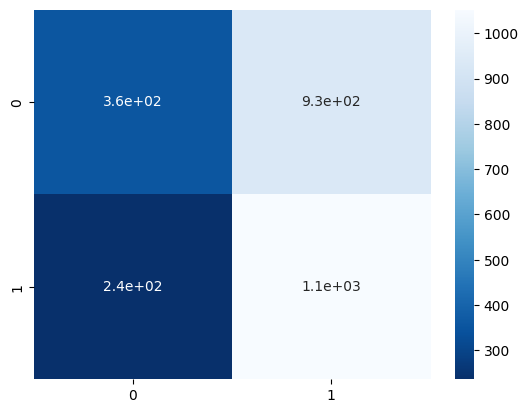

In [110]:
sns.heatmap(data=confusion_matrix(y_true=y_test_bal, y_pred=preds_extra_trees_smoted), cmap="Blues_r", annot=True); plt.show()

In [111]:
print_report(y_pred=preds_extra_trees_smoted, y_test=np.array(y_test_bal))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.60      0.28      0.38      1288
         1.0       0.53      0.82      0.64      1288

    accuracy                           0.55      2576
   macro avg       0.57      0.55      0.51      2576
weighted avg       0.57      0.55      0.51      2576


XGBoost Classifier

In [112]:
xgBoost_classifier_smoted = XGBClassifier()
xgBoost_classifier_smoted.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [113]:
preds_xgboost_smoted = xgBoost_classifier_smoted.predict(X_test_bal)

In [114]:
print_accuracy(y_pred=preds_xgboost_smoted, y_test=np.array(y_test_bal))

Accuracy: 53.0%


In [115]:
print_cm(y_pred=preds_xgboost_smoted, y_test=np.array(y_test_bal))

The confusion matrix is:
 [[643 645]
 [559 729]]



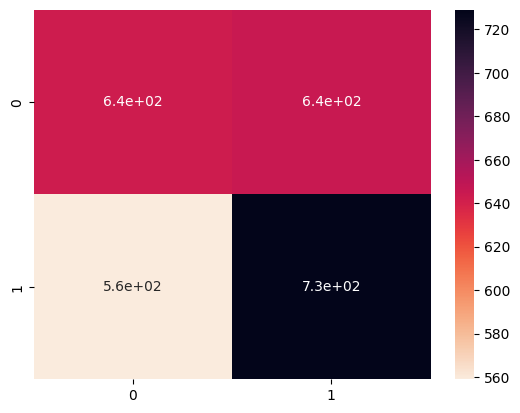

In [116]:
sns.heatmap(data=confusion_matrix(y_true=y_test_bal, y_pred=preds_xgboost_smoted), cmap="rocket_r", annot=True); plt.show()

In [117]:
print_report(y_pred=preds_xgboost_smoted, y_test=np.array(y_test_bal))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.53      0.50      0.52      1288
         1.0       0.53      0.57      0.55      1288

    accuracy                           0.53      2576
   macro avg       0.53      0.53      0.53      2576
weighted avg       0.53      0.53      0.53      2576


Light Gradient Boost Classifier

In [118]:
lgb_classifier_smoted = LGBMClassifier()
lgb_classifier_smoted.fit(X_train_bal, y_train_bal)

C:\Users\mvsg2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mvsg2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [119]:
preds_lgb_smoted = lgb_classifier_smoted.predict(X_test_bal)

In [120]:
print_accuracy(y_pred=preds_lgb_smoted, y_test=np.array(y_test_bal))

Accuracy: 56.99999999999999%


In [121]:
print_cm(y_pred=preds_lgb_smoted, y_test=np.array(y_test_bal))

The confusion matrix is:
 [[730 558]
 [560 728]]



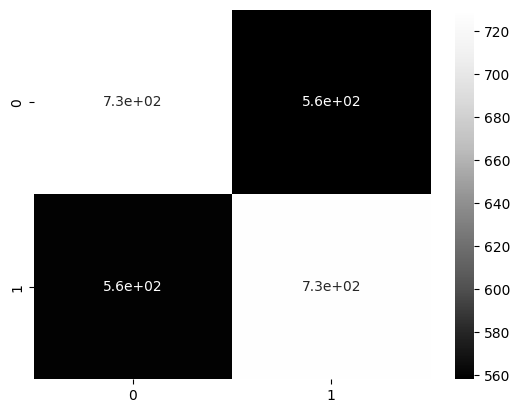

In [122]:
sns.heatmap(data=confusion_matrix(y_true=y_test_bal, y_pred=preds_lgb_smoted), cmap="Greys_r", annot=True); plt.show()

In [123]:
print_report(y_pred=preds_lgb_smoted, y_test=np.array(y_test_bal))

================== CLASSIFICATION REPORT =======================
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      1288
         1.0       0.57      0.57      0.57      1288

    accuracy                           0.57      2576
   macro avg       0.57      0.57      0.57      2576
weighted avg       0.57      0.57      0.57      2576
